# Cahier de TP Antonin Riguet & Neil Perlerin
---
# TP11 Dynamique

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

### 1. Etude du pendule simple

In [3]:
m = 141.3 # g
m_kg = m * 10e-3 # kg
g = 9.8 # m.s-2
l = 0.415 # m

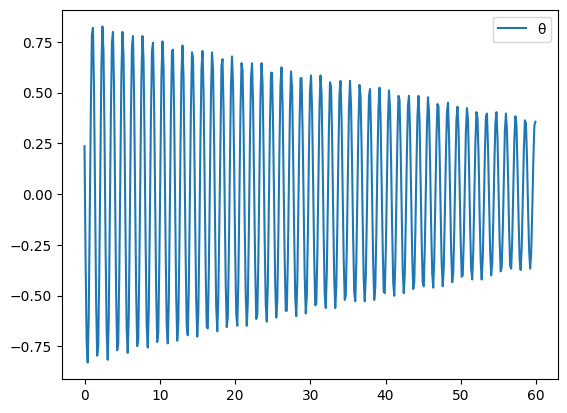

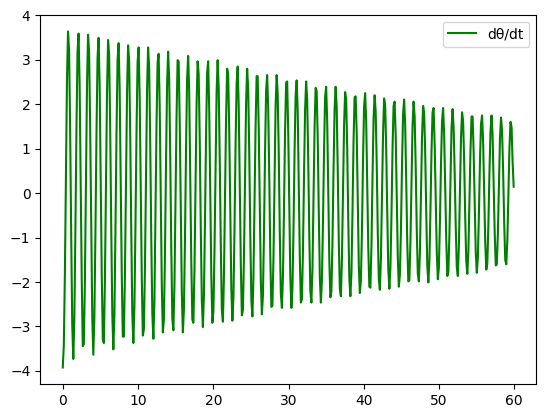

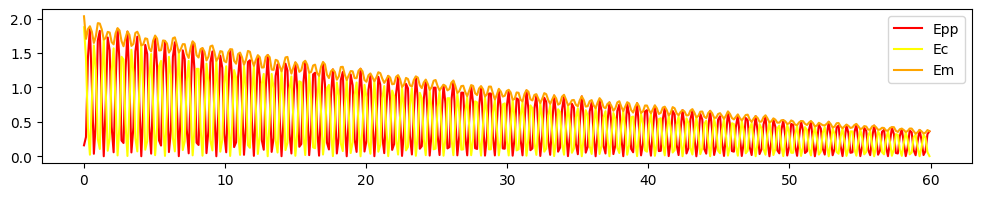

In [4]:
def derivee(x, t) :
    dx = []
    dt = t[1] - t[0]
 
    dx.append((x[1] - x[0]) / dt)
    for i in range(1, len(x) - 1) :
        dx.append((x[i+1] - x[i-1]) / (2  * dt))
    dx.append((x[-1] - x[-2]) / dt)
 
    return dx

def conversion_u_θ(u):
    return ((pi/2) / (3.8 - 2.5)) * (u - 2.5)

fichier = open('Donnees/data_pendule2.txt','r')
fichier.readline()
lignes = fichier.readlines()
 
t = np.zeros(len(lignes))
θ = np.zeros(len(lignes))

for i in range(len(lignes)):
    ligne = lignes[i]
    ligne = ligne.replace(',','.')
    ligne = ligne.replace('E','e')
    t[i] = float(ligne.split(';')[0])
    θ[i] = conversion_u_θ(float(ligne.split(';')[1]))

plt.plot(t, θ, label = 'θ')
plt.legend()
plt.show()

# Dérivée
vθ = derivee(θ, t)

plt.plot(t, vθ, color = 'green', label = 'dθ/dt')
plt.legend()
plt.show()

Epp = [m_kg * g * l * (1 - cos(x)) for x in θ]
Ec = [1/2 * m_kg * (l ** 2) * (x ** 2) for x in vθ]
Em = [Epp0 + Ec0 for (Epp0, Ec0) in zip(Epp, Ec)]

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(2)

plt.plot(t, Epp, color = 'Red', label = 'Epp')
plt.plot(t, Ec, color = 'yellow', label = 'Ec')
plt.plot(t, Em, color = 'orange', label = 'Em')

plt.legend()
plt.show()

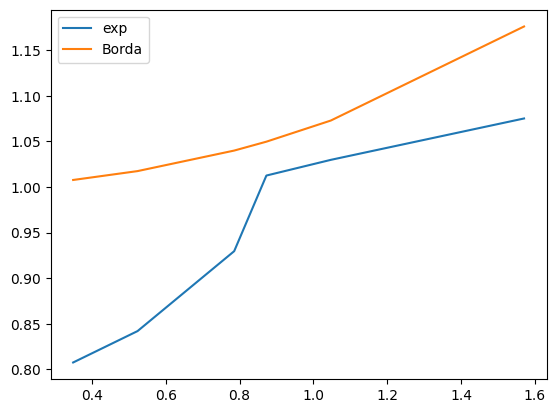

In [5]:
T0 = 1.278

def Borda(x):
    return 1 + ((1 / 16) * (x ** 2)) + ((11 / 3072) * (x ** 4))

filenames = ['data_0.txt', 'data_45.txt', 'data_60.txt']
angles = [pi/2, pi/4, pi/6]
Ts = []

# On calcule ces trois périodes de manière informatique

for filename in filenames :
    fichier = open('Donnees/' + filename, 'r')
    fichier.readline()
    lignes = fichier.readlines()
    
    t = np.zeros(len(lignes))
    u = np.zeros(len(lignes))

    for i in range(len(lignes)):
        ligne = lignes[i]
        ligne = ligne.replace(',','.')
        ligne = ligne.replace('E','e')
        t[i] = float(ligne.split(';')[0])
        u[i] = float(ligne.split(';')[1])

    signshifts = []
    counter = 0
    i = 0
    while counter < 11 :
        if (u[i] - 2.5) * (u[i + 1] - 2.5) < 0 :
            counter += 1
            if counter % 2 == 0 :
                signshifts.append(t[i])
        i += 1
    
    periods = []
    for i in range(len(signshifts) - 1):
        periods.append(signshifts[i+1] - signshifts[i])

    Ts.append(sum(periods) / 5)

# On rajoute des périodes calculées à la main
    
angles += [pi/3, radians(20), radians(50)]
Ts += [1.374, 1.294, 1.316]

Ts = sorted(Ts)
angles = sorted(angles)

plt.plot(angles, [t/T0 for t in Ts], label = 'exp')
plt.plot(angles, [Borda(angle) for angle in angles], label = 'Borda')

plt.legend()
plt.show()

Il semblerait que les périodes calculées expérimentalement et celles calculeés par la formule de borda soient en désaccord.
$\\$ Ceci est sans doute dû au manque de précision des mesures (prises par Antonin) 

### 3. Ressorts et accélérations

#### 3.1 Ressort

In [6]:
couples_masse_longueur = [(0.01, 0.105), (0.02, 0.11), (0.05, 0.125), (0.1, 0.15)]
k_experimentaux = [19.62, 19.62, 19.62, 19.62]

l0 = 0.1
g = 9.81 #m.s-1

def calculer_k(m, l) :
    return (m * g) / (l - l0)

Sans avoir besoin de calculer d'incertitude, la méthode fonctionne et produit des résultats cohérents avec la valeur (20 $N.m^{-1}$) constructeur.

In [7]:
k = 19.62
m = 0.1
w0 = sqrt(k / m)

frequences = [23 / 10.28, 23 / 9.94, 23 / 10.16]
incertitude_frequences = 0.1 / sqrt(3) #~ 0.1 de précision
frequence_th = w0 / (2 * pi)

print(f"E = {round(abs((sum(frequences) / len(frequences)) - frequence_th) / incertitude_frequences, 2)} < 2 donc le protocol est bon")

E = 0.73 < 2 donc le protocol est bon


#### 3.2 Accélérations

Avec un PFD, on peut récupérer l'accélération selon l'axe X de l'accéléromètre :

$\\\hspace{.5cm} a_x = -cos(\theta)g $

Puis, avec un théorème d'énergétique, on peut obtenir que :

$\\\hspace{.5cm} cos(\theta) = \frac{v^2}{2gl} + cos(\theta_0)$ (avec $\theta_0$ l'angle initial du pendule)

On remplace pour finalement obtenir : 

$\\\hspace{.5cm} a_x = -\frac{v^2}{2l} - gcos(\theta_0)$

La vitesse maximale du pendule est donc atteinte lorsque $\frac{v_{max}^2}{2l}$ vaut la différence d'accélération entre celle pour $\theta = \theta_0$, et celle pour laquelle $\theta = 0$ ($0.3g$ selon l'accéléromètre).

Au final, on a donc :

$\\\hspace{.5cm} v_{max} = \sqrt{0.3g2l} \approx 1.65 \ m.s^-1$

### 2. Mesure d'un coefficient de frottement fluide

En plongeant des billes dans du glycérol et en mesurant leur vitesse de chute (distance / temps), avec des paramètres comme la masse volumique des billes et du glycérol, ainsi qu'un terme permettant de compenser la poussée d'archimède due au rayon de la bille, on peut établir une équation permettant d'obtenir le coefficient de viscosité du glycérol.

In [17]:
def masse_volumique(m, r) :
    v = 4 * pi * (r ** 3) / 3
    return m / v

In [44]:
# Constantes 
g = 9810 # cm.s^-2
R_tube = 1.814 # cm 
h_tube = 26.75
mv_glycérol = 1.26 # g/cm

m_billes = [0.4, 2.0, 5.5, 8.4]
r_billes = [0.215, 0.400, 0.550, 0.63]
mv_billes = [masse_volumique(m, r) for m, r in zip(m_billes, r_billes)]

def coefficient(n_bille, temps) :
    vitesse = h_tube / temps
    return (2 / 9) * ((mv_billes[n_bille] - mv_glycérol) / vitesse) * (r_billes[n_bille] ** 2) * g * (1 - (2.1 * r_billes[n_bille] / R_tube))

temps_mesurés_bille_0 = [4.28, 5.28, 4.53]
temps_mesurés_bille_1 = [1.72, 1.87, 1.87]
temps_mesurés_bille_2 = [1.12, 1.32, 1.38]
temps_mesurés_bille_3 = [1.15, 1.12, 1.19]

coefficient_bille_0 = sum([coefficient(0, t) for t in temps_mesurés_bille_0]) / 3
coefficient_bille_1 = sum([coefficient(1, t) for t in temps_mesurés_bille_1]) / 3
coefficient_bille_2 = sum([coefficient(2, t) for t in temps_mesurés_bille_2]) / 3
coefficient_bille_3 = sum([coefficient(3, t) for t in temps_mesurés_bille_3]) / 3

coefficients = [c * 10e-3 for c in [coefficient_bille_0, coefficient_bille_1, coefficient_bille_2, coefficient_bille_3]]

for i in range(len(coefficients)) :
    print(f"La bille {i} donne un coefficient de {round(coefficients[i], 2)} P/s")

La bille 0 donne un coefficient de 1.11 P/s
La bille 1 donne un coefficient de 0.79 P/s
La bille 2 donne un coefficient de 0.76 P/s
La bille 3 donne un coefficient de 0.68 P/s


Les billes donnant des coefficients de viscosité différents les unes des autres, il semble que le protocol soit peu adapté à la mesure de ce genre de paramètres.